## Import

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from itertools import chain

# for reading and displaying images
# from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# models
from src.architectures.resnet import *
from src.architectures.levakov_96 import *
from src.architectures.inception import *
from src.architectures.dinsdale import *

from src.run import *

from torch.optim import *
import torch.optim as optim
from torchsummary import summary
from tensorboardX import SummaryWriter

## Dataloader
for kFold, it will be run again on the run

In [2]:
from src.dataloader import *

train_dset = MyDataset(task_type='age')
test_dset = MyDataset(task_type='age', test=True)

train_loader = DataLoader(train_dset, batch_size=8)
test_loader = DataLoader(test_dset, batch_size=8)

## Load Model

In [4]:
def load_model(model, verbose=True):
    
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(f'Model {model.capitalize()} is selected.')

    if model == 'resnet':
        

        opt = Option()
        model = generate_model(model_depth=opt.model_depth,
                                    n_classes=opt.n_classes,
                                    n_input_channels=opt.n_input_channels,
                                    shortcut_type=opt.shortcut_type,
                                    conv1_t_size=opt.conv1_t_size,
                                    conv1_t_stride=opt.conv1_t_stride,
                                    no_max_pool=opt.no_max_pool,
                                    widen_factor=opt.resnet_widen_factor)

    elif model == 'levakov':
        model = Levakov(task_type='age')

    elif model == 'inception':
        model = Inception3()

    elif model == 'dinsdale':
        model = Dinsdale(1, 1, 2)

    else: return None

    model.to(device)
    if verbose:
        print(summary(model, input_size=(1, 96, 96, 96)))
    
    return model, device

model = 'resnet'
# model, device = load_model('dinsdale')

## Setups

Default Settings

In [5]:
task_type = 'age' # no longer used.
resize = True
scheduler = False
epochs = range(100)
folds = range(10)

Loss & Optimizer

In [6]:
from src.losses import RMSELoss

loss_fn = nn.MSELoss()
lamb = 0.0005
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

Metrics

In [7]:
rmse_fn = RMSELoss()
mae_fn = nn.L1Loss()

## Run

### kFold Run

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

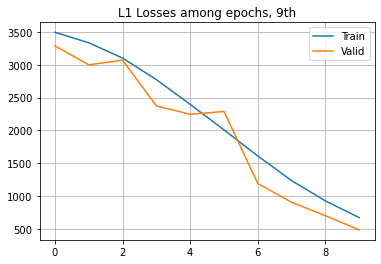

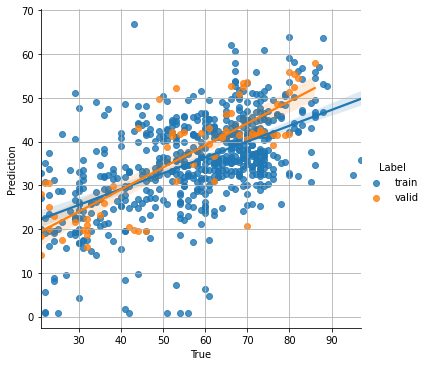

FOLD 0 - EPOCHS 10
MSE  :: [TRAIN] 470.504 | [VALID] 299.400
MAE  :: [TRAIN] 18.682   | [VALID] 14.686
RMSE :: [TRAIN] 21.198  | [VALID] 16.929
CORR :: [TRAIN] 0.629 | [VALID] 0.537
FOLD 0 - EPOCHS 15
MSE  :: [TRAIN] 177.568 | [VALID] 114.583
MAE  :: [TRAIN] 10.765   | [VALID] 8.916
RMSE :: [TRAIN] 12.740  | [VALID] 10.403
CORR :: [TRAIN] 0.651 | [VALID] 0.868


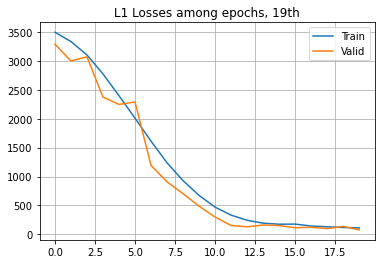

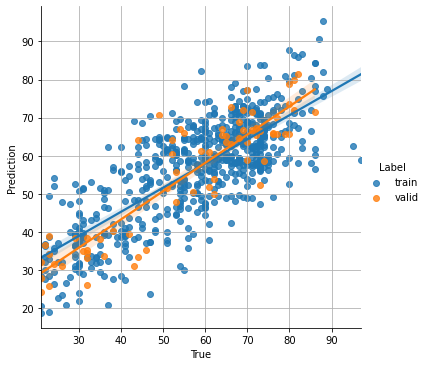

FOLD 0 - EPOCHS 20
MSE  :: [TRAIN] 108.399 | [VALID] 119.832
MAE  :: [TRAIN] 8.312   | [VALID] 8.782
RMSE :: [TRAIN] 10.007  | [VALID] 10.784
CORR :: [TRAIN] 0.776 | [VALID] 0.902
FOLD 0 - EPOCHS 25
MSE  :: [TRAIN] 92.028 | [VALID] 70.717
MAE  :: [TRAIN] 7.621   | [VALID] 6.595
RMSE :: [TRAIN] 9.183  | [VALID] 8.208
CORR :: [TRAIN] 0.811 | [VALID] 0.902


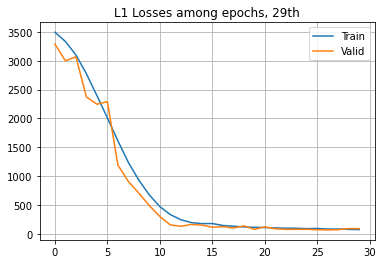

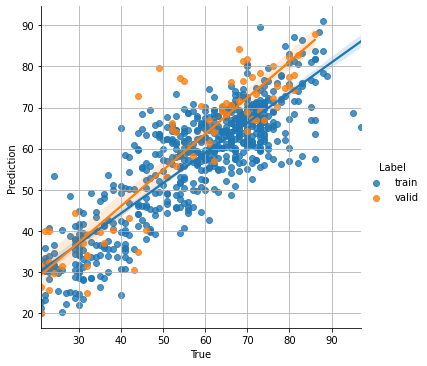

FOLD 0 - EPOCHS 30
MSE  :: [TRAIN] 69.769 | [VALID] 90.595
MAE  :: [TRAIN] 6.498   | [VALID] 7.146
RMSE :: [TRAIN] 7.937  | [VALID] 9.075
CORR :: [TRAIN] 0.860 | [VALID] 0.900
FOLD 0 - EPOCHS 35
MSE  :: [TRAIN] 56.507 | [VALID] 245.683
MAE  :: [TRAIN] 5.791   | [VALID] 12.943
RMSE :: [TRAIN] 7.103  | [VALID] 15.297
CORR :: [TRAIN] 0.888 | [VALID] 0.788


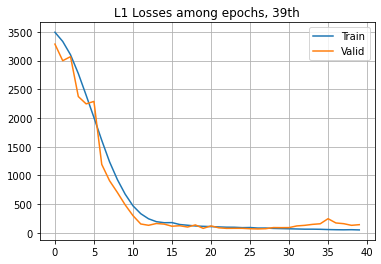

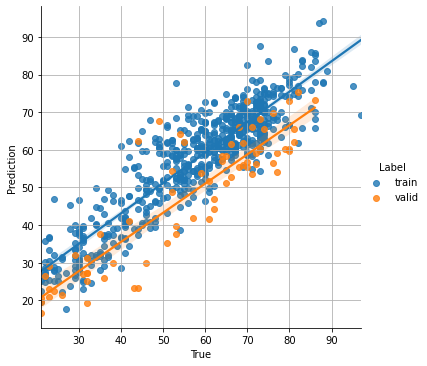

FOLD 0 - EPOCHS 40
MSE  :: [TRAIN] 51.828 | [VALID] 118.332
MAE  :: [TRAIN] 5.591   | [VALID] 8.658
RMSE :: [TRAIN] 6.834  | [VALID] 10.713
CORR :: [TRAIN] 0.898 | [VALID] 0.869
FOLD 0 - EPOCHS 45
MSE  :: [TRAIN] 39.353 | [VALID] 178.998
MAE  :: [TRAIN] 4.928   | [VALID] 10.862
RMSE :: [TRAIN] 5.862  | [VALID] 12.949
CORR :: [TRAIN] 0.923 | [VALID] 0.844


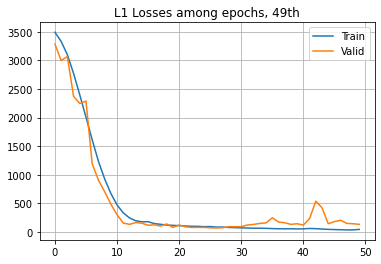

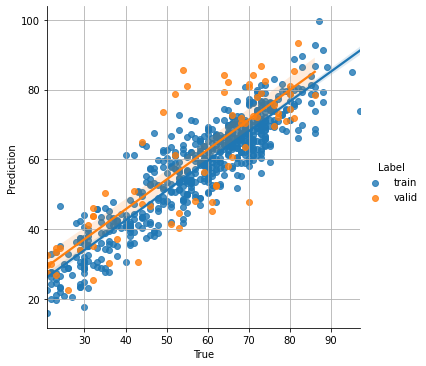

FOLD 0 - EPOCHS 50
MSE  :: [TRAIN] 42.150 | [VALID] 151.617
MAE  :: [TRAIN] 5.079   | [VALID] 9.842
RMSE :: [TRAIN] 6.150  | [VALID] 12.041
CORR :: [TRAIN] 0.918 | [VALID] 0.867
FOLD 0 - EPOCHS 55
MSE  :: [TRAIN] 41.473 | [VALID] 100.279
MAE  :: [TRAIN] 5.058   | [VALID] 8.011
RMSE :: [TRAIN] 6.108  | [VALID] 9.882
CORR :: [TRAIN] 0.919 | [VALID] 0.862


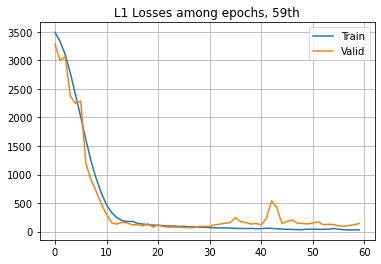

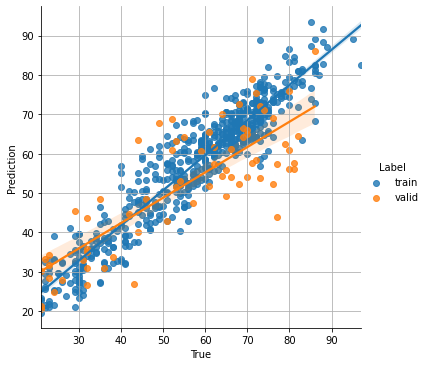

FOLD 0 - EPOCHS 60
MSE  :: [TRAIN] 27.396 | [VALID] 254.329
MAE  :: [TRAIN] 4.058   | [VALID] 13.149
RMSE :: [TRAIN] 4.871  | [VALID] 15.739
CORR :: [TRAIN] 0.947 | [VALID] 0.833
FOLD 0 - EPOCHS 65
MSE  :: [TRAIN] 26.633 | [VALID] 137.460
MAE  :: [TRAIN] 4.040   | [VALID] 9.324
RMSE :: [TRAIN] 4.829  | [VALID] 11.538
CORR :: [TRAIN] 0.949 | [VALID] 0.868


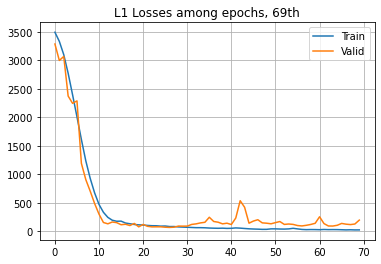

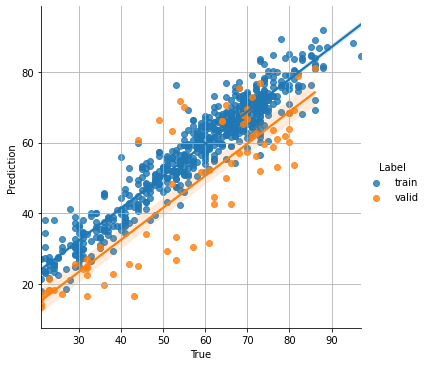

FOLD 0 - EPOCHS 70
MSE  :: [TRAIN] 22.387 | [VALID] 117.413
MAE  :: [TRAIN] 3.578   | [VALID] 8.343
RMSE :: [TRAIN] 4.419  | [VALID] 10.685
CORR :: [TRAIN] 0.957 | [VALID] 0.885
FOLD 0 - EPOCHS 75
MSE  :: [TRAIN] 22.859 | [VALID] 98.372
MAE  :: [TRAIN] 3.712   | [VALID] 7.752
RMSE :: [TRAIN] 4.480  | [VALID] 9.631
CORR :: [TRAIN] 0.956 | [VALID] 0.883


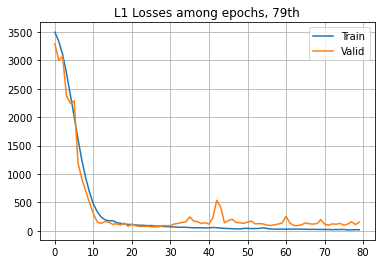

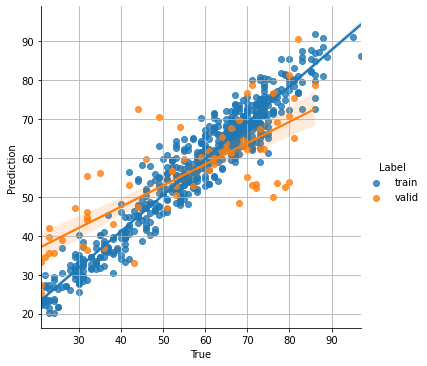

FOLD 0 - EPOCHS 80
MSE  :: [TRAIN] 25.609 | [VALID] 272.499
MAE  :: [TRAIN] 3.915   | [VALID] 14.134
RMSE :: [TRAIN] 4.781  | [VALID] 16.139
CORR :: [TRAIN] 0.951 | [VALID] 0.713
FOLD 0 - EPOCHS 85
MSE  :: [TRAIN] 20.708 | [VALID] 132.490
MAE  :: [TRAIN] 3.605   | [VALID] 8.982
RMSE :: [TRAIN] 4.352  | [VALID] 10.843
CORR :: [TRAIN] 0.960 | [VALID] 0.819


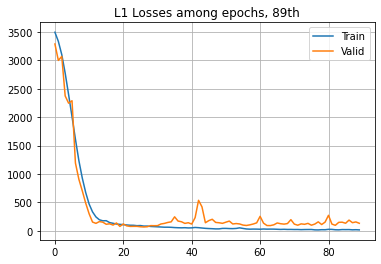

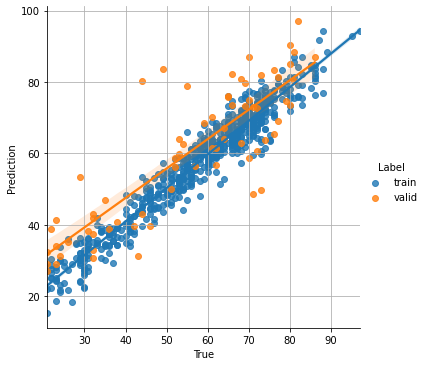

FOLD 0 - EPOCHS 90
MSE  :: [TRAIN] 13.580 | [VALID] 131.563
MAE  :: [TRAIN] 2.863   | [VALID] 9.001
RMSE :: [TRAIN] 3.456  | [VALID] 11.271
CORR :: [TRAIN] 0.974 | [VALID] 0.876
FOLD 0 - EPOCHS 95
MSE  :: [TRAIN] 17.685 | [VALID] 111.844
MAE  :: [TRAIN] 3.258   | [VALID] 8.298
RMSE :: [TRAIN] 3.936  | [VALID] 10.460
CORR :: [TRAIN] 0.966 | [VALID] 0.867


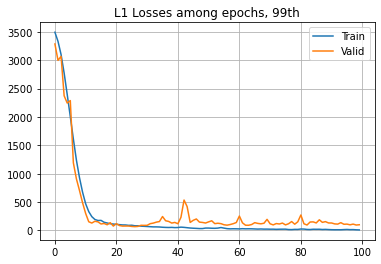

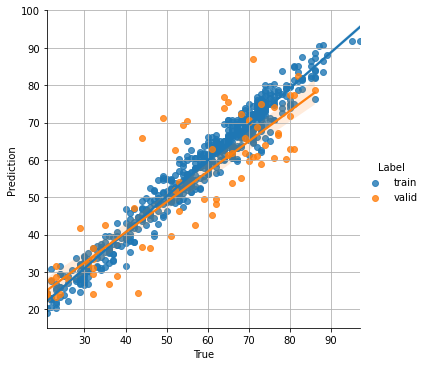

FOLD 0MSE  :: [TEST] 113.091
MAE  :: [TEST] 8.045
RMSE :: [TEST] 10.214
CORR :: [TEST] 0.770


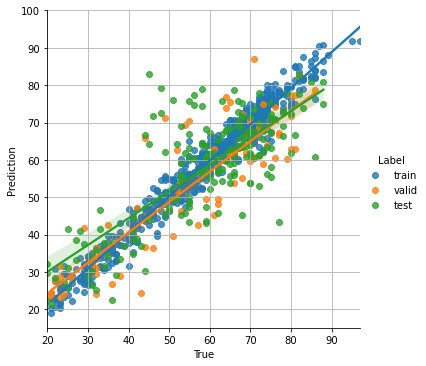

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

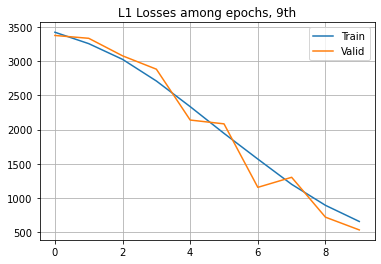

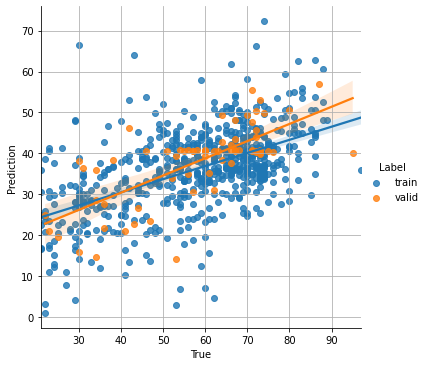

FOLD 1 - EPOCHS 10
MSE  :: [TRAIN] 448.068 | [VALID] 345.490
MAE  :: [TRAIN] 18.082   | [VALID] 16.381
RMSE :: [TRAIN] 20.637  | [VALID] 18.390
CORR :: [TRAIN] 0.603 | [VALID] 0.784
FOLD 1 - EPOCHS 15
MSE  :: [TRAIN] 158.555 | [VALID] 295.233
MAE  :: [TRAIN] 10.163   | [VALID] 14.236
RMSE :: [TRAIN] 11.926  | [VALID] 17.024
CORR :: [TRAIN] 0.695 | [VALID] 0.767


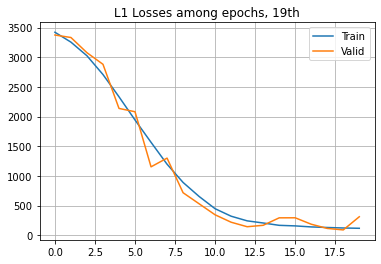

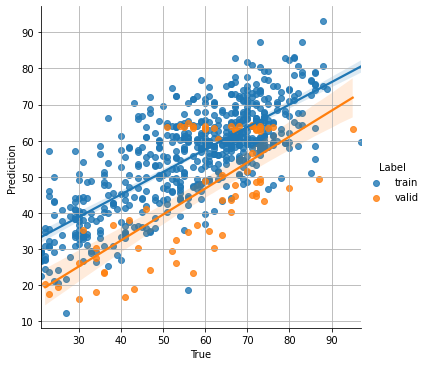

FOLD 1 - EPOCHS 20
MSE  :: [TRAIN] 113.910 | [VALID] 248.641
MAE  :: [TRAIN] 8.655   | [VALID] 12.974
RMSE :: [TRAIN] 10.238  | [VALID] 15.612
CORR :: [TRAIN] 0.776 | [VALID] 0.733
FOLD 1 - EPOCHS 25
MSE  :: [TRAIN] 91.250 | [VALID] 82.216
MAE  :: [TRAIN] 7.651   | [VALID] 7.139
RMSE :: [TRAIN] 9.152  | [VALID] 8.678
CORR :: [TRAIN] 0.823 | [VALID] 0.832


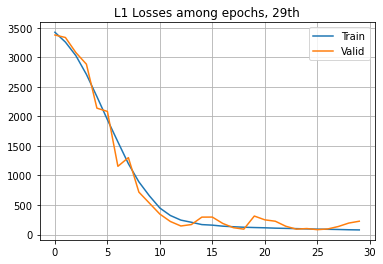

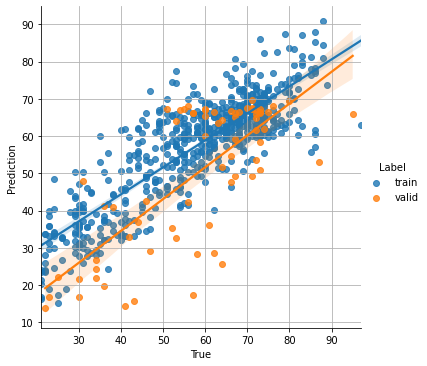

FOLD 1 - EPOCHS 30
MSE  :: [TRAIN] 74.640 | [VALID] 244.617
MAE  :: [TRAIN] 6.774   | [VALID] 12.323
RMSE :: [TRAIN] 8.232  | [VALID] 14.953
CORR :: [TRAIN] 0.858 | [VALID] 0.716
FOLD 1 - EPOCHS 35
MSE  :: [TRAIN] 62.758 | [VALID] 96.375
MAE  :: [TRAIN] 6.211   | [VALID] 8.030
RMSE :: [TRAIN] 7.545  | [VALID] 9.344
CORR :: [TRAIN] 0.882 | [VALID] 0.809


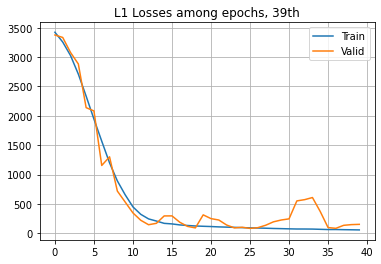

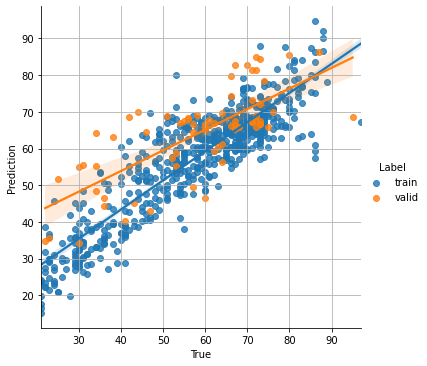

FOLD 1 - EPOCHS 40
MSE  :: [TRAIN] 53.165 | [VALID] 169.269
MAE  :: [TRAIN] 5.598   | [VALID] 10.378
RMSE :: [TRAIN] 6.897  | [VALID] 12.506
CORR :: [TRAIN] 0.901 | [VALID] 0.730
FOLD 1 - EPOCHS 45
MSE  :: [TRAIN] 50.019 | [VALID] 150.639
MAE  :: [TRAIN] 5.475   | [VALID] 9.931
RMSE :: [TRAIN] 6.715  | [VALID] 11.836
CORR :: [TRAIN] 0.907 | [VALID] 0.761


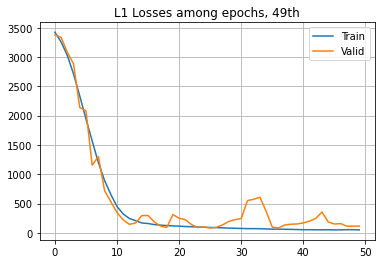

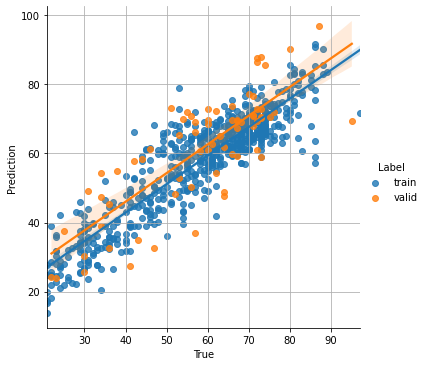

FOLD 1 - EPOCHS 50
MSE  :: [TRAIN] 47.653 | [VALID] 114.144
MAE  :: [TRAIN] 5.278   | [VALID] 8.325
RMSE :: [TRAIN] 6.513  | [VALID] 9.902
CORR :: [TRAIN] 0.911 | [VALID] 0.806
FOLD 1 - EPOCHS 55
MSE  :: [TRAIN] 37.670 | [VALID] 156.618
MAE  :: [TRAIN] 4.574   | [VALID] 9.887
RMSE :: [TRAIN] 5.742  | [VALID] 11.922
CORR :: [TRAIN] 0.931 | [VALID] 0.771


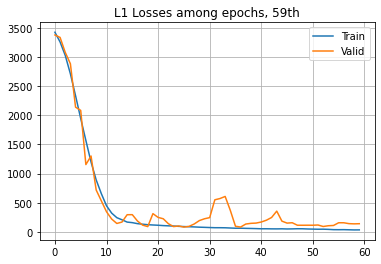

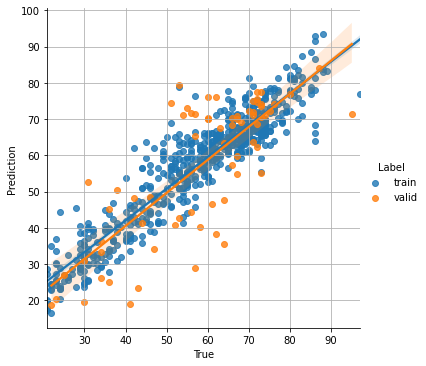

FOLD 1 - EPOCHS 60
MSE  :: [TRAIN] 36.773 | [VALID] 169.615
MAE  :: [TRAIN] 4.619   | [VALID] 10.452
RMSE :: [TRAIN] 5.738  | [VALID] 12.540
CORR :: [TRAIN] 0.932 | [VALID] 0.722
FOLD 1 - EPOCHS 65
MSE  :: [TRAIN] 24.193 | [VALID] 220.938
MAE  :: [TRAIN] 3.724   | [VALID] 11.493
RMSE :: [TRAIN] 4.559  | [VALID] 13.746
CORR :: [TRAIN] 0.956 | [VALID] 0.760


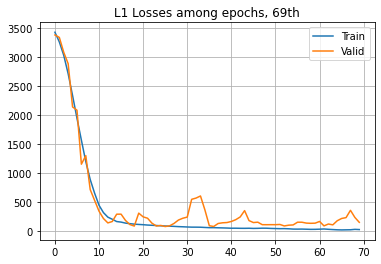

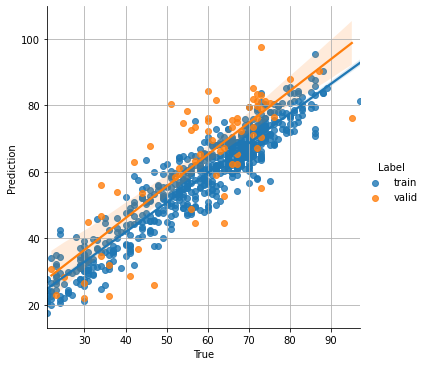

FOLD 1 - EPOCHS 70
MSE  :: [TRAIN] 30.151 | [VALID] 178.554
MAE  :: [TRAIN] 4.369   | [VALID] 10.704
RMSE :: [TRAIN] 5.262  | [VALID] 12.772
CORR :: [TRAIN] 0.945 | [VALID] 0.768
FOLD 1 - EPOCHS 75
MSE  :: [TRAIN] 19.365 | [VALID] 187.261
MAE  :: [TRAIN] 3.254   | [VALID] 11.042
RMSE :: [TRAIN] 4.081  | [VALID] 13.108
CORR :: [TRAIN] 0.965 | [VALID] 0.620


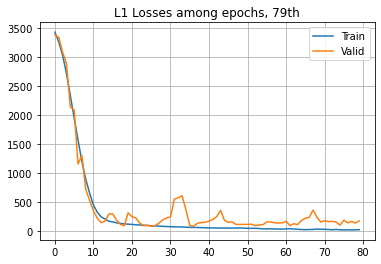

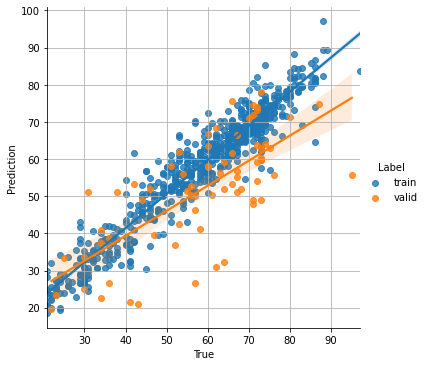

FOLD 1 - EPOCHS 80
MSE  :: [TRAIN] 20.119 | [VALID] 128.134
MAE  :: [TRAIN] 3.451   | [VALID] 8.909
RMSE :: [TRAIN] 4.178  | [VALID] 10.793
CORR :: [TRAIN] 0.964 | [VALID] 0.721
FOLD 1 - EPOCHS 85
MSE  :: [TRAIN] 22.579 | [VALID] 141.064
MAE  :: [TRAIN] 3.755   | [VALID] 9.419
RMSE :: [TRAIN] 4.502  | [VALID] 11.641
CORR :: [TRAIN] 0.959 | [VALID] 0.681


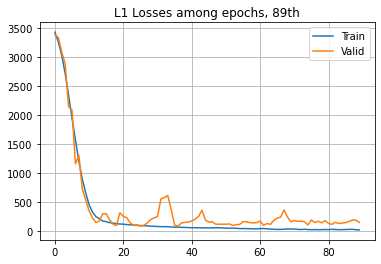

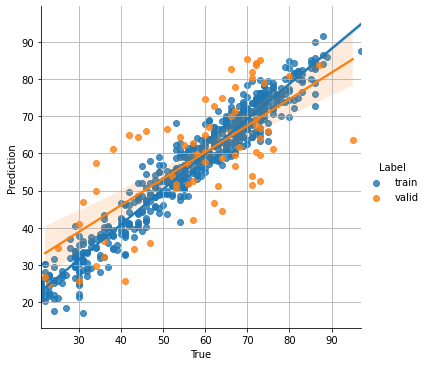

FOLD 1 - EPOCHS 90
MSE  :: [TRAIN] 13.822 | [VALID] 148.383
MAE  :: [TRAIN] 2.858   | [VALID] 9.753
RMSE :: [TRAIN] 3.459  | [VALID] 11.839
CORR :: [TRAIN] 0.975 | [VALID] 0.675
FOLD 1 - EPOCHS 95
MSE  :: [TRAIN] 14.251 | [VALID] 132.336
MAE  :: [TRAIN] 2.971   | [VALID] 8.967
RMSE :: [TRAIN] 3.551  | [VALID] 11.253
CORR :: [TRAIN] 0.974 | [VALID] 0.719


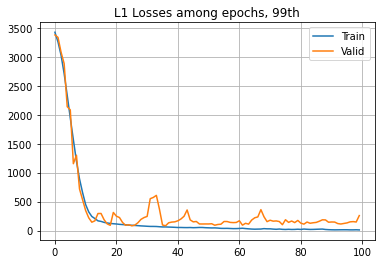

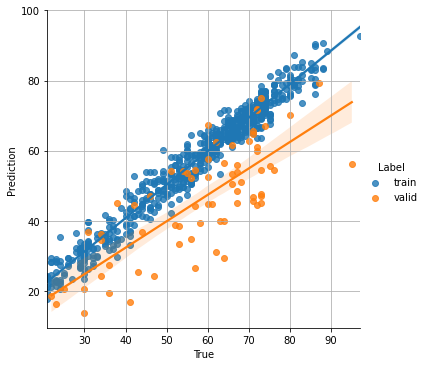

FOLD 1MSE  :: [TEST] 216.455
MAE  :: [TEST] 12.014
RMSE :: [TEST] 14.477
CORR :: [TEST] 0.768


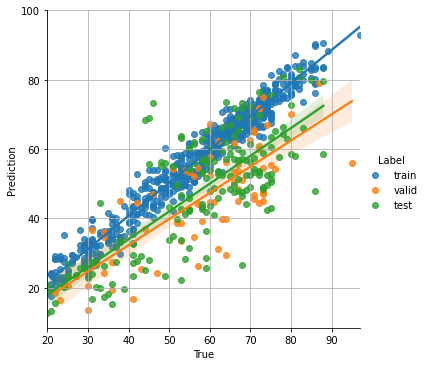

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

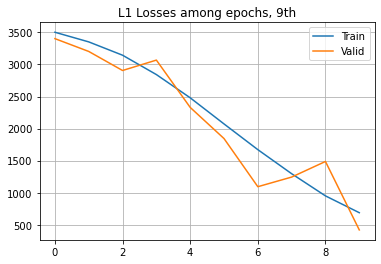

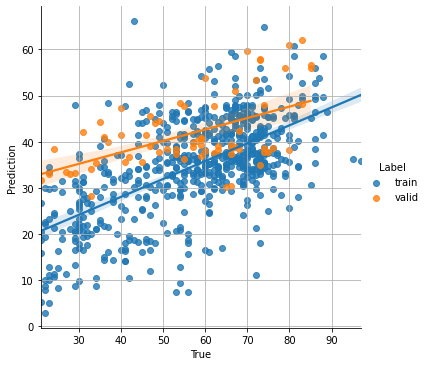

FOLD 2 - EPOCHS 10
MSE  :: [TRAIN] 488.155 | [VALID] 230.007
MAE  :: [TRAIN] 19.100   | [VALID] 12.548
RMSE :: [TRAIN] 21.508  | [VALID] 14.775
CORR :: [TRAIN] 0.618 | [VALID] 0.747
FOLD 2 - EPOCHS 15
MSE  :: [TRAIN] 159.805 | [VALID] 278.783
MAE  :: [TRAIN] 10.299   | [VALID] 13.500
RMSE :: [TRAIN] 12.004  | [VALID] 16.282
CORR :: [TRAIN] 0.697 | [VALID] 0.636


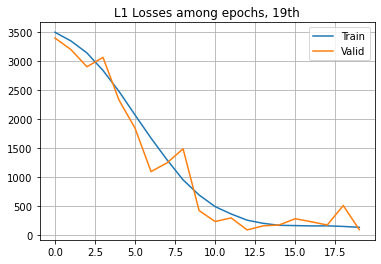

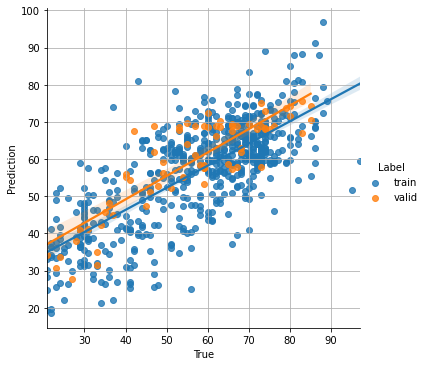

FOLD 2 - EPOCHS 20
MSE  :: [TRAIN] 121.190 | [VALID] 99.702
MAE  :: [TRAIN] 8.723   | [VALID] 8.217
RMSE :: [TRAIN] 10.408  | [VALID] 9.768
CORR :: [TRAIN] 0.756 | [VALID] 0.863
FOLD 2 - EPOCHS 25
MSE  :: [TRAIN] 104.069 | [VALID] 209.600
MAE  :: [TRAIN] 8.185   | [VALID] 12.154
RMSE :: [TRAIN] 9.730  | [VALID] 14.110
CORR :: [TRAIN] 0.794 | [VALID] 0.822


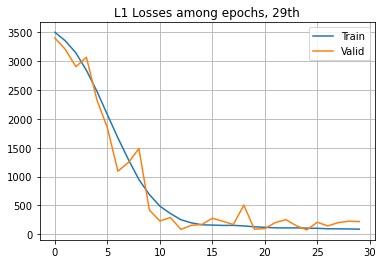

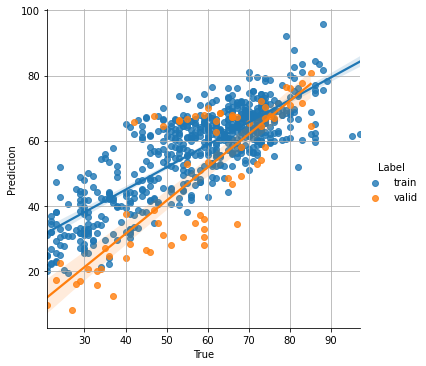

FOLD 2 - EPOCHS 30
MSE  :: [TRAIN] 84.763 | [VALID] 242.551
MAE  :: [TRAIN] 7.320   | [VALID] 13.224
RMSE :: [TRAIN] 8.816  | [VALID] 15.117
CORR :: [TRAIN] 0.834 | [VALID] 0.806
FOLD 2 - EPOCHS 35
MSE  :: [TRAIN] 69.552 | [VALID] 177.612
MAE  :: [TRAIN] 6.634   | [VALID] 10.956
RMSE :: [TRAIN] 7.984  | [VALID] 12.995
CORR :: [TRAIN] 0.866 | [VALID] 0.836


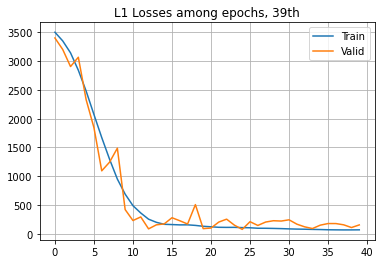

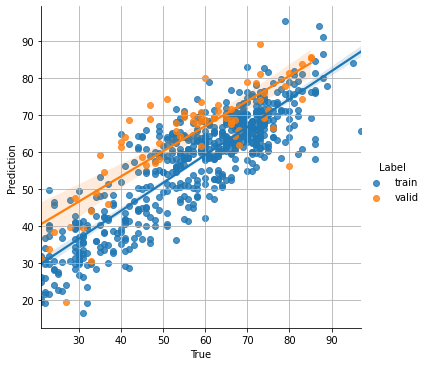

FOLD 2 - EPOCHS 40
MSE  :: [TRAIN] 65.091 | [VALID] 93.829
MAE  :: [TRAIN] 6.308   | [VALID] 7.903
RMSE :: [TRAIN] 7.708  | [VALID] 9.553
CORR :: [TRAIN] 0.875 | [VALID] 0.845
FOLD 2 - EPOCHS 45
MSE  :: [TRAIN] 52.191 | [VALID] 112.961
MAE  :: [TRAIN] 5.666   | [VALID] 8.777
RMSE :: [TRAIN] 6.871  | [VALID] 10.498
CORR :: [TRAIN] 0.901 | [VALID] 0.811


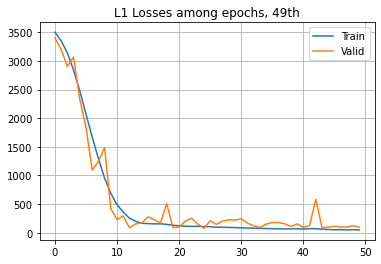

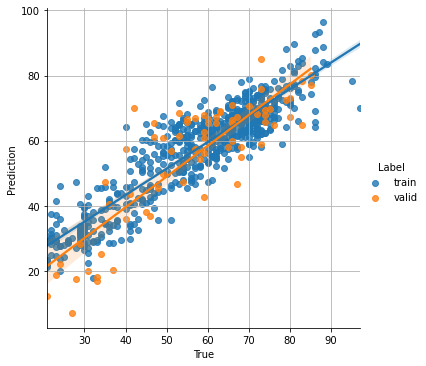

FOLD 2 - EPOCHS 50
MSE  :: [TRAIN] 47.582 | [VALID] 112.744
MAE  :: [TRAIN] 5.350   | [VALID] 8.573
RMSE :: [TRAIN] 6.523  | [VALID] 10.442
CORR :: [TRAIN] 0.911 | [VALID] 0.806
FOLD 2 - EPOCHS 55
MSE  :: [TRAIN] 33.785 | [VALID] 162.628
MAE  :: [TRAIN] 4.370   | [VALID] 9.570
RMSE :: [TRAIN] 5.462  | [VALID] 12.397
CORR :: [TRAIN] 0.938 | [VALID] 0.749


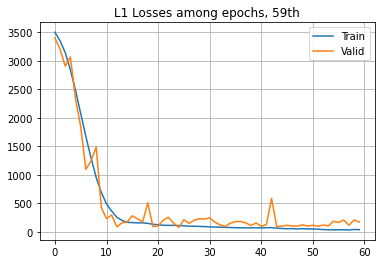

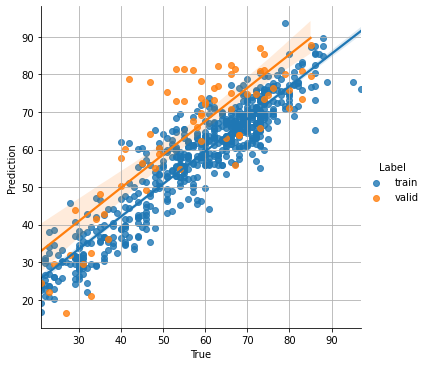

FOLD 2 - EPOCHS 60
MSE  :: [TRAIN] 37.454 | [VALID] 124.970
MAE  :: [TRAIN] 4.743   | [VALID] 8.864
RMSE :: [TRAIN] 5.712  | [VALID] 10.634
CORR :: [TRAIN] 0.930 | [VALID] 0.811
FOLD 2 - EPOCHS 65
MSE  :: [TRAIN] 25.561 | [VALID] 82.599
MAE  :: [TRAIN] 3.899   | [VALID] 6.887
RMSE :: [TRAIN] 4.710  | [VALID] 8.833
CORR :: [TRAIN] 0.953 | [VALID] 0.850


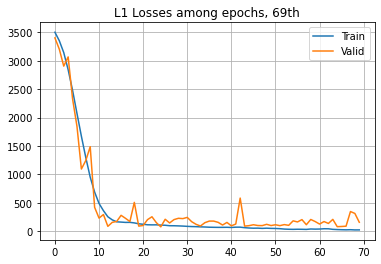

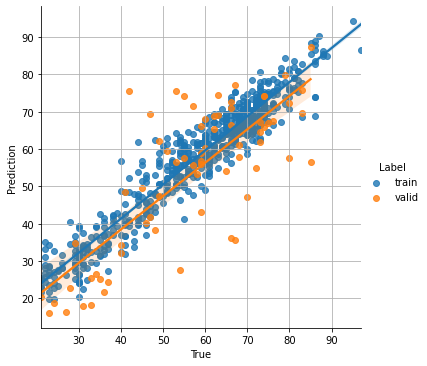

FOLD 2 - EPOCHS 70
MSE  :: [TRAIN] 22.967 | [VALID] 721.384
MAE  :: [TRAIN] 3.671   | [VALID] 23.128
RMSE :: [TRAIN] 4.465  | [VALID] 26.566
CORR :: [TRAIN] 0.958 | [VALID] 0.511
FOLD 2 - EPOCHS 75
MSE  :: [TRAIN] 23.953 | [VALID] 242.286
MAE  :: [TRAIN] 3.807   | [VALID] 12.406
RMSE :: [TRAIN] 4.609  | [VALID] 14.998
CORR :: [TRAIN] 0.956 | [VALID] 0.750


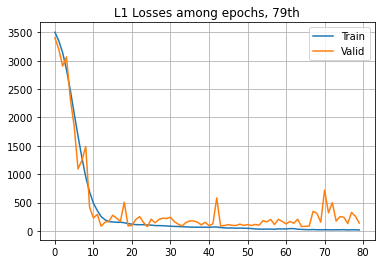

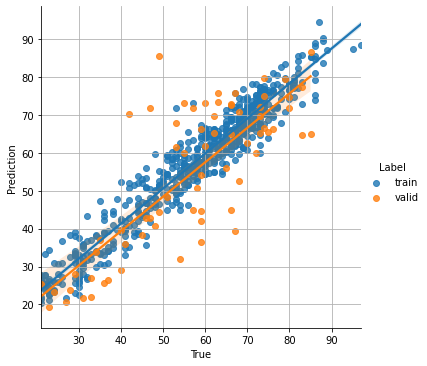

FOLD 2 - EPOCHS 80
MSE  :: [TRAIN] 18.642 | [VALID] 115.420
MAE  :: [TRAIN] 3.379   | [VALID] 8.005
RMSE :: [TRAIN] 4.083  | [VALID] 10.397
CORR :: [TRAIN] 0.966 | [VALID] 0.799
FOLD 2 - EPOCHS 85
MSE  :: [TRAIN] 23.064 | [VALID] 101.017
MAE  :: [TRAIN] 3.766   | [VALID] 7.901
RMSE :: [TRAIN] 4.521  | [VALID] 9.787
CORR :: [TRAIN] 0.958 | [VALID] 0.835


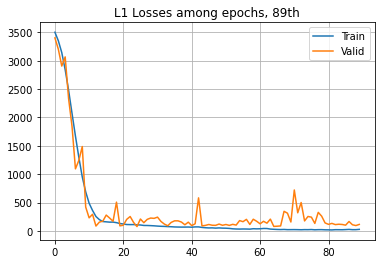

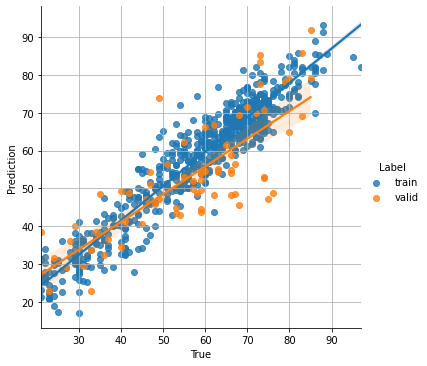

FOLD 2 - EPOCHS 90
MSE  :: [TRAIN] 20.154 | [VALID] 140.322
MAE  :: [TRAIN] 3.551   | [VALID] 9.631
RMSE :: [TRAIN] 4.274  | [VALID] 11.421
CORR :: [TRAIN] 0.963 | [VALID] 0.791
FOLD 2 - EPOCHS 95
MSE  :: [TRAIN] 15.963 | [VALID] 97.559
MAE  :: [TRAIN] 3.196   | [VALID] 7.768
RMSE :: [TRAIN] 3.826  | [VALID] 9.263
CORR :: [TRAIN] 0.971 | [VALID] 0.815


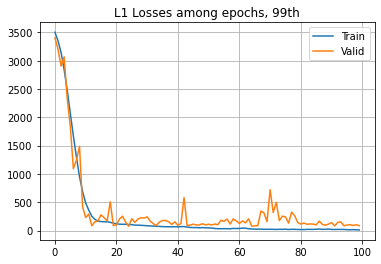

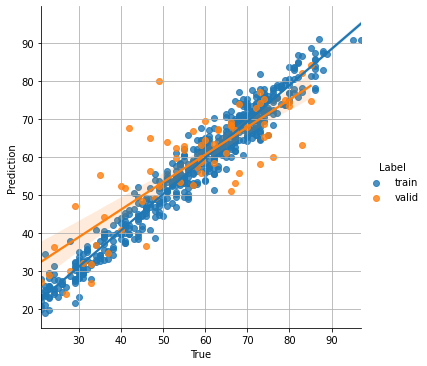

FOLD 2MSE  :: [TEST] 92.466
MAE  :: [TEST] 7.496
RMSE :: [TEST] 9.424
CORR :: [TEST] 0.806


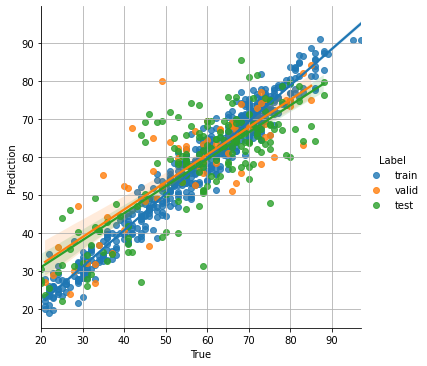

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

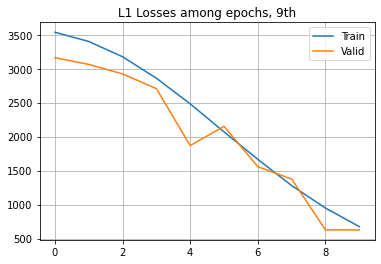

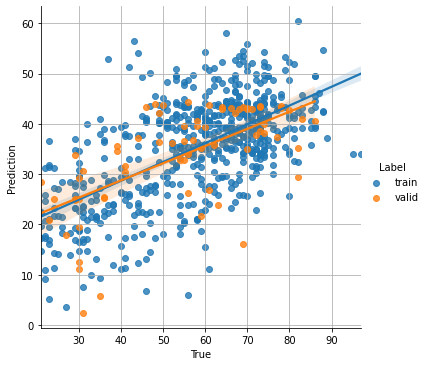

FOLD 3 - EPOCHS 10
MSE  :: [TRAIN] 485.424 | [VALID] 843.766
MAE  :: [TRAIN] 18.886   | [VALID] 25.024
RMSE :: [TRAIN] 21.377  | [VALID] 28.634
CORR :: [TRAIN] 0.598 | [VALID] 0.594
FOLD 3 - EPOCHS 15
MSE  :: [TRAIN] 165.966 | [VALID] 191.198
MAE  :: [TRAIN] 10.420   | [VALID] 11.369
RMSE :: [TRAIN] 12.354  | [VALID] 13.586
CORR :: [TRAIN] 0.673 | [VALID] 0.741


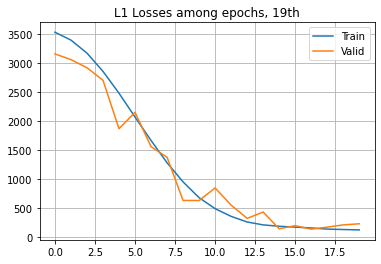

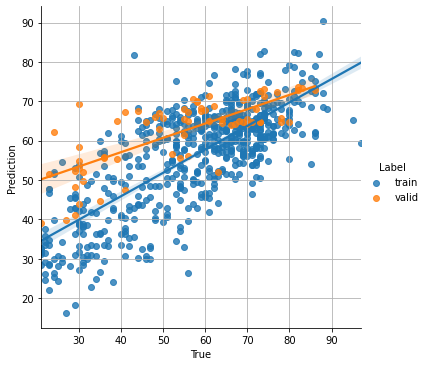

FOLD 3 - EPOCHS 20
MSE  :: [TRAIN] 113.274 | [VALID] 147.578
MAE  :: [TRAIN] 8.591   | [VALID] 9.810
RMSE :: [TRAIN] 10.146  | [VALID] 11.918
CORR :: [TRAIN] 0.769 | [VALID] 0.811
FOLD 3 - EPOCHS 25
MSE  :: [TRAIN] 98.506 | [VALID] 165.751
MAE  :: [TRAIN] 7.992   | [VALID] 9.912
RMSE :: [TRAIN] 9.464  | [VALID] 12.441
CORR :: [TRAIN] 0.801 | [VALID] 0.779


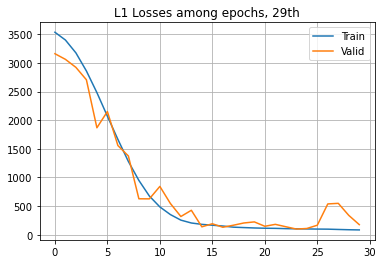

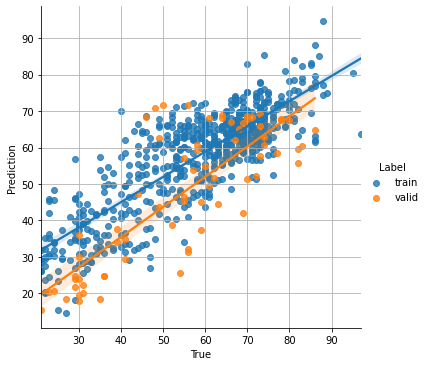

FOLD 3 - EPOCHS 30
MSE  :: [TRAIN] 81.613 | [VALID] 179.750
MAE  :: [TRAIN] 7.226   | [VALID] 10.550
RMSE :: [TRAIN] 8.557  | [VALID] 13.079
CORR :: [TRAIN] 0.838 | [VALID] 0.791
FOLD 3 - EPOCHS 35
MSE  :: [TRAIN] 66.095 | [VALID] 272.325
MAE  :: [TRAIN] 6.411   | [VALID] 14.115
RMSE :: [TRAIN] 7.682  | [VALID] 16.322
CORR :: [TRAIN] 0.871 | [VALID] 0.803


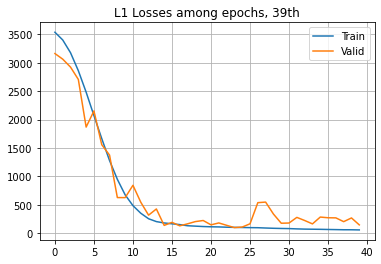

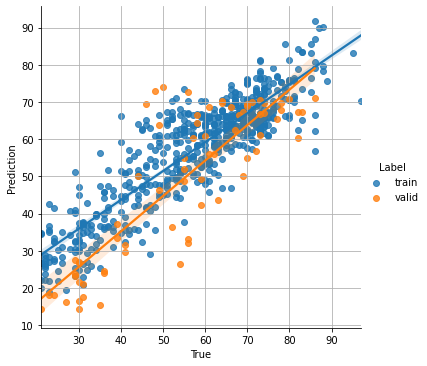

FOLD 3 - EPOCHS 40
MSE  :: [TRAIN] 56.933 | [VALID] 203.807
MAE  :: [TRAIN] 5.903   | [VALID] 12.115
RMSE :: [TRAIN] 7.139  | [VALID] 14.129
CORR :: [TRAIN] 0.890 | [VALID] 0.833
FOLD 3 - EPOCHS 45
MSE  :: [TRAIN] 53.931 | [VALID] 218.680
MAE  :: [TRAIN] 5.762   | [VALID] 11.814
RMSE :: [TRAIN] 6.852  | [VALID] 14.218
CORR :: [TRAIN] 0.896 | [VALID] 0.655


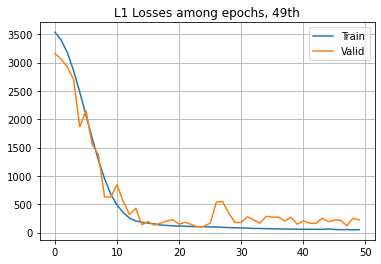

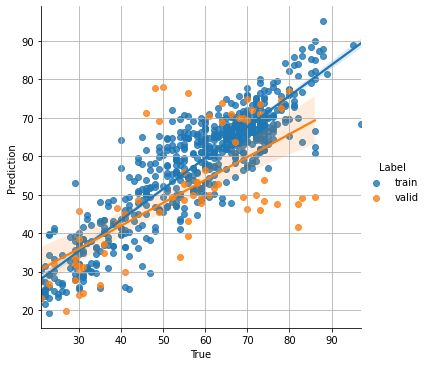

FOLD 3 - EPOCHS 50
MSE  :: [TRAIN] 47.461 | [VALID] 178.003
MAE  :: [TRAIN] 5.316   | [VALID] 9.848
RMSE :: [TRAIN] 6.435  | [VALID] 12.796
CORR :: [TRAIN] 0.909 | [VALID] 0.747
FOLD 3 - EPOCHS 55
MSE  :: [TRAIN] 41.465 | [VALID] 259.734
MAE  :: [TRAIN] 4.965   | [VALID] 14.054
RMSE :: [TRAIN] 6.128  | [VALID] 16.021
CORR :: [TRAIN] 0.921 | [VALID] 0.836


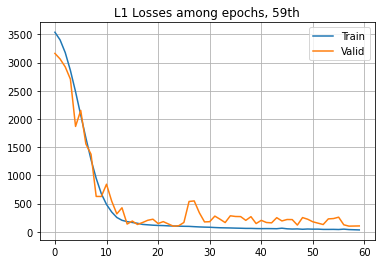

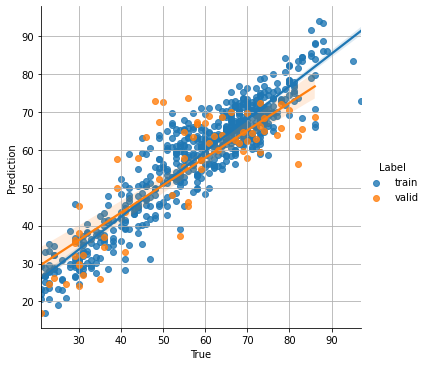

FOLD 3 - EPOCHS 60
MSE  :: [TRAIN] 33.762 | [VALID] 138.284
MAE  :: [TRAIN] 4.523   | [VALID] 9.582
RMSE :: [TRAIN] 5.506  | [VALID] 11.329
CORR :: [TRAIN] 0.936 | [VALID] 0.756
FOLD 3 - EPOCHS 65
MSE  :: [TRAIN] 37.764 | [VALID] 172.794
MAE  :: [TRAIN] 4.744   | [VALID] 9.732
RMSE :: [TRAIN] 5.808  | [VALID] 12.478
CORR :: [TRAIN] 0.929 | [VALID] 0.711


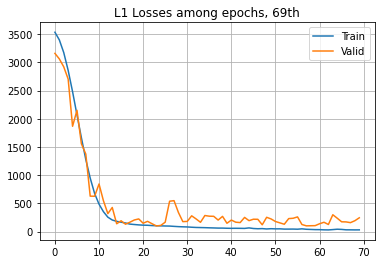

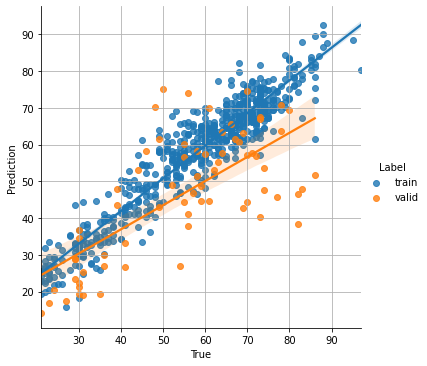

FOLD 3 - EPOCHS 70
MSE  :: [TRAIN] 24.590 | [VALID] 257.008
MAE  :: [TRAIN] 3.903   | [VALID] 13.711
RMSE :: [TRAIN] 4.716  | [VALID] 15.774
CORR :: [TRAIN] 0.954 | [VALID] 0.771
FOLD 3 - EPOCHS 75
MSE  :: [TRAIN] 25.753 | [VALID] 366.038
MAE  :: [TRAIN] 3.927   | [VALID] 16.517
RMSE :: [TRAIN] 4.804  | [VALID] 18.869
CORR :: [TRAIN] 0.952 | [VALID] 0.757


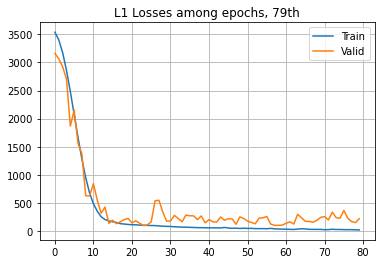

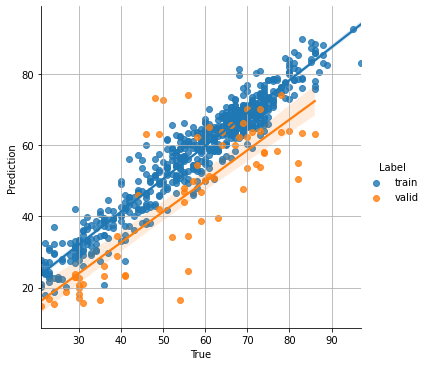

FOLD 3 - EPOCHS 80
MSE  :: [TRAIN] 22.689 | [VALID] 309.684
MAE  :: [TRAIN] 3.697   | [VALID] 15.352
RMSE :: [TRAIN] 4.449  | [VALID] 17.363
CORR :: [TRAIN] 0.958 | [VALID] 0.794
FOLD 3 - EPOCHS 85
MSE  :: [TRAIN] 19.999 | [VALID] 382.538
MAE  :: [TRAIN] 3.502   | [VALID] 17.596
RMSE :: [TRAIN] 4.235  | [VALID] 19.387
CORR :: [TRAIN] 0.963 | [VALID] 0.826


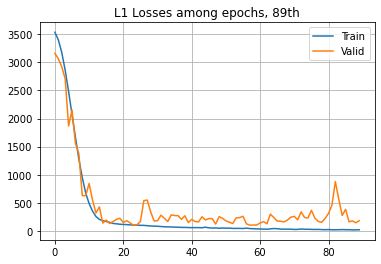

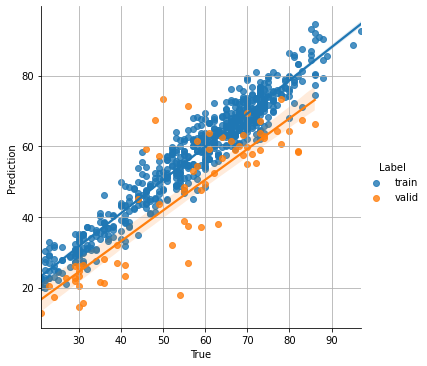

FOLD 3 - EPOCHS 90
MSE  :: [TRAIN] 20.787 | [VALID] 154.298
MAE  :: [TRAIN] 3.619   | [VALID] 9.522
RMSE :: [TRAIN] 4.342  | [VALID] 11.908
CORR :: [TRAIN] 0.961 | [VALID] 0.834
FOLD 3 - EPOCHS 95
MSE  :: [TRAIN] 16.753 | [VALID] 138.016
MAE  :: [TRAIN] 3.270   | [VALID] 9.212
RMSE :: [TRAIN] 3.889  | [VALID] 11.268
CORR :: [TRAIN] 0.969 | [VALID] 0.842


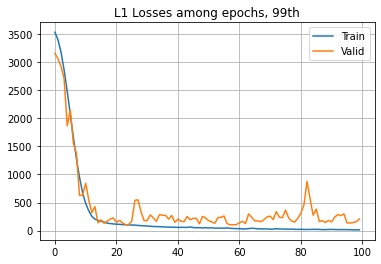

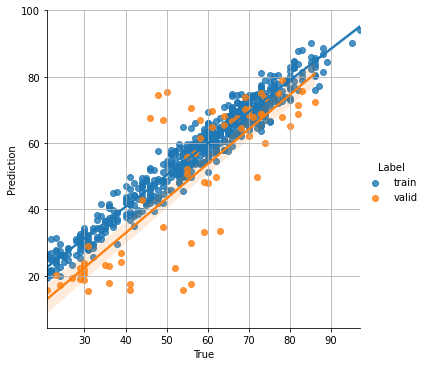

FOLD 3MSE  :: [TEST] 262.048
MAE  :: [TEST] 13.063
RMSE :: [TEST] 15.896
CORR :: [TEST] 0.726


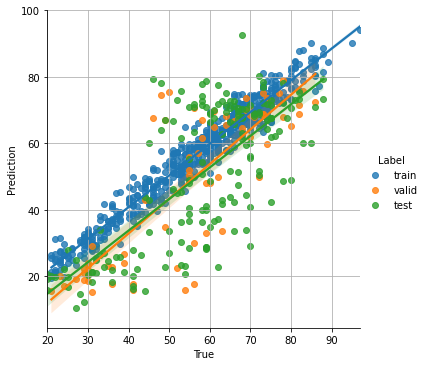

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

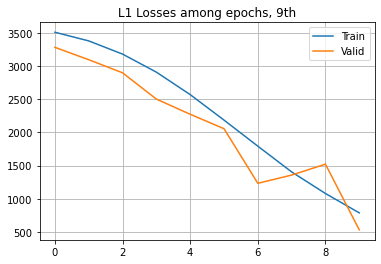

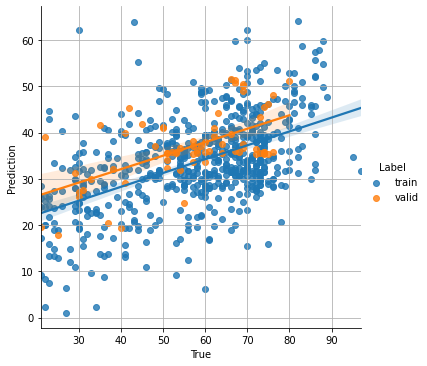

FOLD 4 - EPOCHS 10
MSE  :: [TRAIN] 598.447 | [VALID] 574.274
MAE  :: [TRAIN] 21.380   | [VALID] 21.288
RMSE :: [TRAIN] 23.945  | [VALID] 23.829
CORR :: [TRAIN] 0.512 | [VALID] 0.679
FOLD 4 - EPOCHS 15
MSE  :: [TRAIN] 172.679 | [VALID] 110.184
MAE  :: [TRAIN] 10.691   | [VALID] 8.728
RMSE :: [TRAIN] 12.673  | [VALID] 10.427
CORR :: [TRAIN] 0.685 | [VALID] 0.727


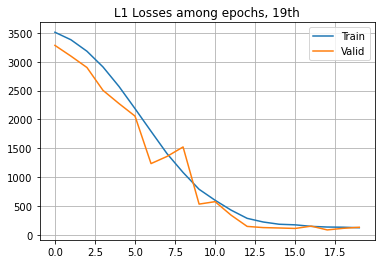

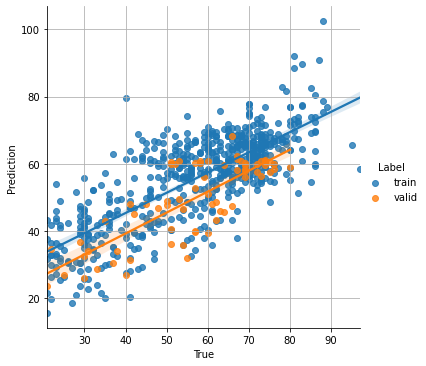

FOLD 4 - EPOCHS 20
MSE  :: [TRAIN] 110.373 | [VALID] 152.502
MAE  :: [TRAIN] 8.394   | [VALID] 10.340
RMSE :: [TRAIN] 10.126  | [VALID] 12.130
CORR :: [TRAIN] 0.786 | [VALID] 0.767
FOLD 4 - EPOCHS 25
MSE  :: [TRAIN] 85.594 | [VALID] 87.065
MAE  :: [TRAIN] 7.336   | [VALID] 7.529
RMSE :: [TRAIN] 8.852  | [VALID] 8.996
CORR :: [TRAIN] 0.837 | [VALID] 0.815


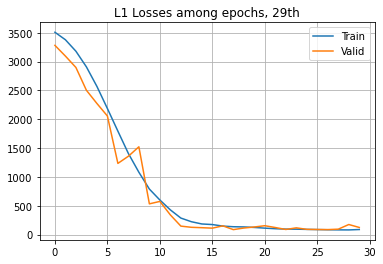

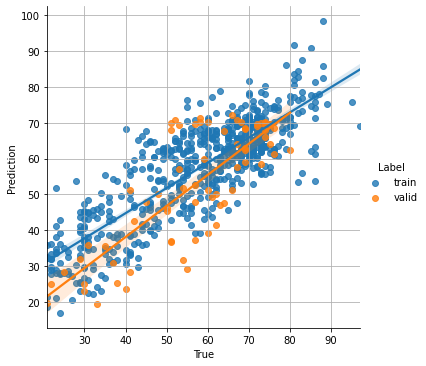

FOLD 4 - EPOCHS 30
MSE  :: [TRAIN] 78.418 | [VALID] 115.835
MAE  :: [TRAIN] 6.949   | [VALID] 8.682
RMSE :: [TRAIN] 8.406  | [VALID] 10.366
CORR :: [TRAIN] 0.851 | [VALID] 0.800
FOLD 4 - EPOCHS 35
MSE  :: [TRAIN] 65.336 | [VALID] 83.986
MAE  :: [TRAIN] 6.371   | [VALID] 7.610
RMSE :: [TRAIN] 7.676  | [VALID] 9.046
CORR :: [TRAIN] 0.878 | [VALID] 0.800


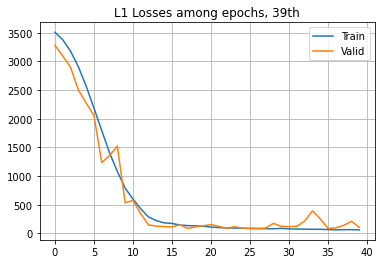

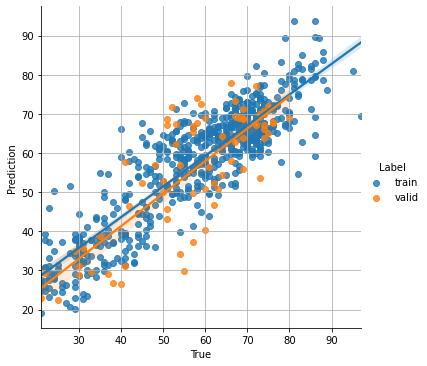

FOLD 4 - EPOCHS 40
MSE  :: [TRAIN] 53.578 | [VALID] 111.346
MAE  :: [TRAIN] 5.667   | [VALID] 8.269
RMSE :: [TRAIN] 6.951  | [VALID] 10.404
CORR :: [TRAIN] 0.901 | [VALID] 0.772
FOLD 4 - EPOCHS 45
MSE  :: [TRAIN] 44.106 | [VALID] 138.422
MAE  :: [TRAIN] 5.121   | [VALID] 9.006
RMSE :: [TRAIN] 6.253  | [VALID] 11.487
CORR :: [TRAIN] 0.919 | [VALID] 0.778


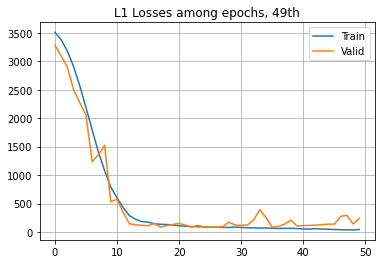

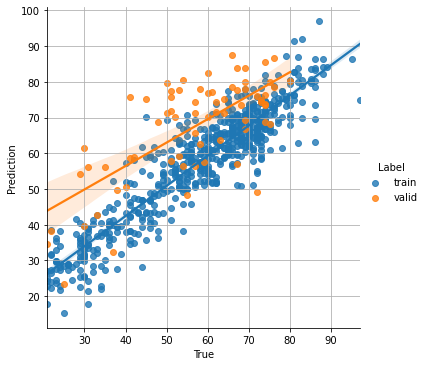

FOLD 4 - EPOCHS 50
MSE  :: [TRAIN] 45.308 | [VALID] 137.019
MAE  :: [TRAIN] 5.276   | [VALID] 9.512
RMSE :: [TRAIN] 6.391  | [VALID] 11.368
CORR :: [TRAIN] 0.917 | [VALID] 0.810
FOLD 4 - EPOCHS 55
MSE  :: [TRAIN] 33.586 | [VALID] 161.030
MAE  :: [TRAIN] 4.523   | [VALID] 10.135
RMSE :: [TRAIN] 5.494  | [VALID] 12.404
CORR :: [TRAIN] 0.939 | [VALID] 0.666


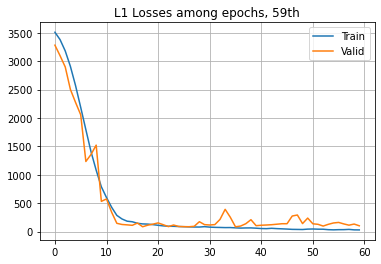

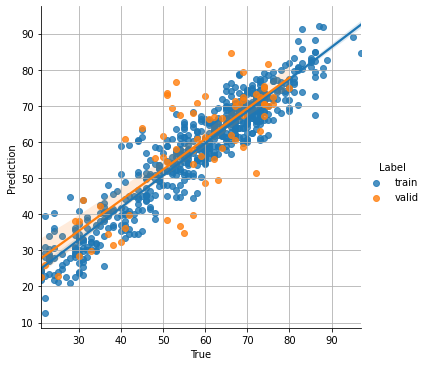

FOLD 4 - EPOCHS 60
MSE  :: [TRAIN] 31.619 | [VALID] 93.683
MAE  :: [TRAIN] 4.408   | [VALID] 7.679
RMSE :: [TRAIN] 5.276  | [VALID] 9.470
CORR :: [TRAIN] 0.943 | [VALID] 0.813
FOLD 4 - EPOCHS 65
MSE  :: [TRAIN] 23.911 | [VALID] 191.962
MAE  :: [TRAIN] 3.849   | [VALID] 11.057
RMSE :: [TRAIN] 4.608  | [VALID] 13.600
CORR :: [TRAIN] 0.957 | [VALID] 0.800


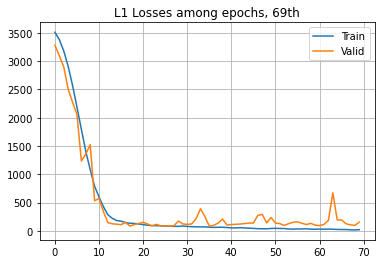

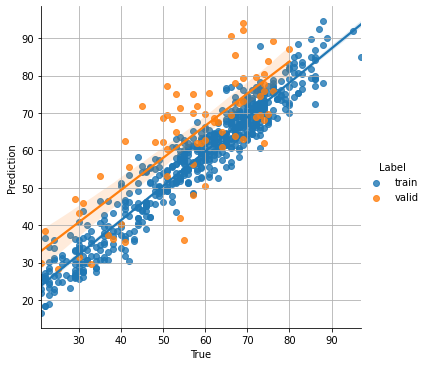

FOLD 4 - EPOCHS 70
MSE  :: [TRAIN] 19.809 | [VALID] 140.139
MAE  :: [TRAIN] 3.412   | [VALID] 9.709
RMSE :: [TRAIN] 4.152  | [VALID] 11.499
CORR :: [TRAIN] 0.965 | [VALID] 0.770
FOLD 4 - EPOCHS 75
MSE  :: [TRAIN] 24.202 | [VALID] 96.365
MAE  :: [TRAIN] 3.857   | [VALID] 7.741
RMSE :: [TRAIN] 4.664  | [VALID] 9.624
CORR :: [TRAIN] 0.957 | [VALID] 0.793


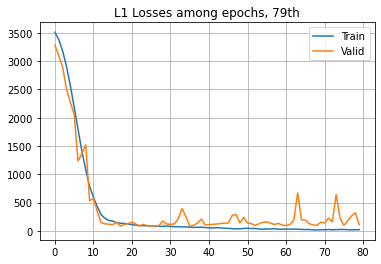

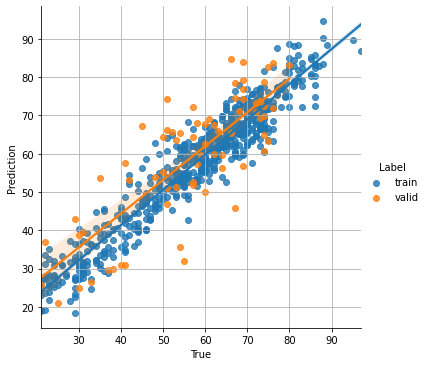

FOLD 4 - EPOCHS 80
MSE  :: [TRAIN] 19.982 | [VALID] 84.262
MAE  :: [TRAIN] 3.454   | [VALID] 7.459
RMSE :: [TRAIN] 4.174  | [VALID] 8.985
CORR :: [TRAIN] 0.964 | [VALID] 0.811
FOLD 4 - EPOCHS 85
MSE  :: [TRAIN] 16.476 | [VALID] 120.122
MAE  :: [TRAIN] 3.087   | [VALID] 8.651
RMSE :: [TRAIN] 3.804  | [VALID] 10.707
CORR :: [TRAIN] 0.971 | [VALID] 0.779


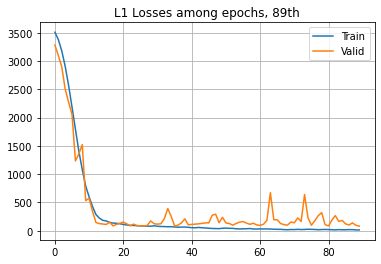

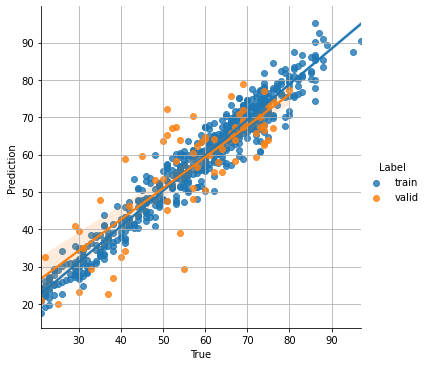

FOLD 4 - EPOCHS 90
MSE  :: [TRAIN] 10.413 | [VALID] 82.652
MAE  :: [TRAIN] 2.449   | [VALID] 7.202
RMSE :: [TRAIN] 2.997  | [VALID] 8.894
CORR :: [TRAIN] 0.982 | [VALID] 0.819
FOLD 4 - EPOCHS 95
MSE  :: [TRAIN] 11.108 | [VALID] 106.336
MAE  :: [TRAIN] 2.662   | [VALID] 8.615
RMSE :: [TRAIN] 3.151  | [VALID] 10.020
CORR :: [TRAIN] 0.980 | [VALID] 0.801


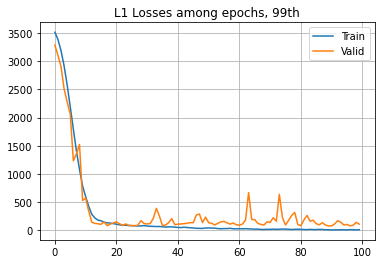

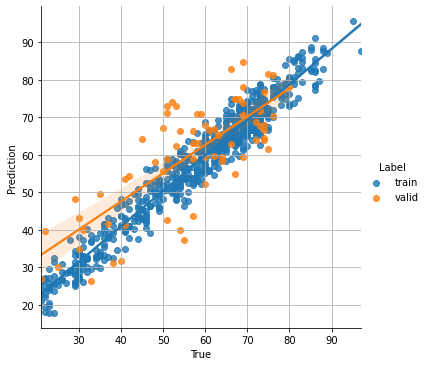

FOLD 4MSE  :: [TEST] 148.970
MAE  :: [TEST] 9.208
RMSE :: [TEST] 11.783
CORR :: [TEST] 0.721


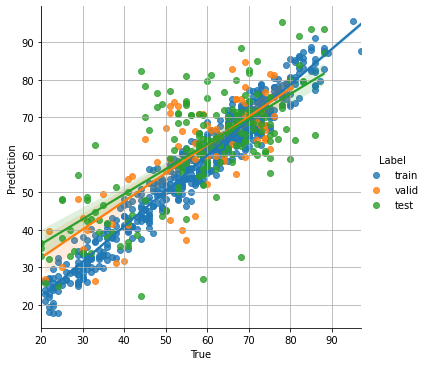

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

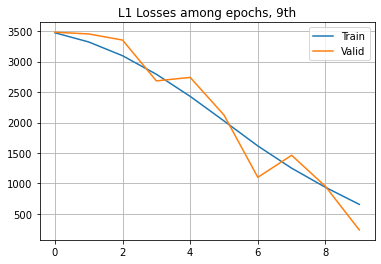

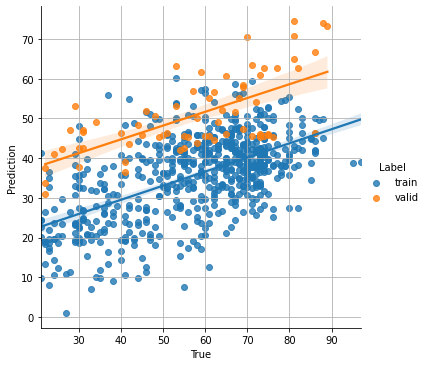

FOLD 5 - EPOCHS 10
MSE  :: [TRAIN] 468.109 | [VALID] 223.044
MAE  :: [TRAIN] 18.465   | [VALID] 12.699
RMSE :: [TRAIN] 20.989  | [VALID] 14.504
CORR :: [TRAIN] 0.581 | [VALID] 0.754
FOLD 5 - EPOCHS 15
MSE  :: [TRAIN] 160.544 | [VALID] 147.762
MAE  :: [TRAIN] 10.232   | [VALID] 9.865
RMSE :: [TRAIN] 12.038  | [VALID] 11.917
CORR :: [TRAIN] 0.680 | [VALID] 0.820


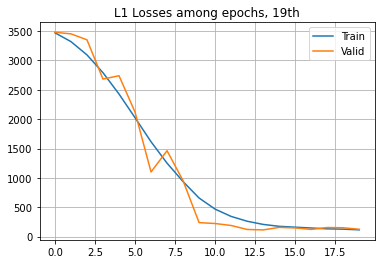

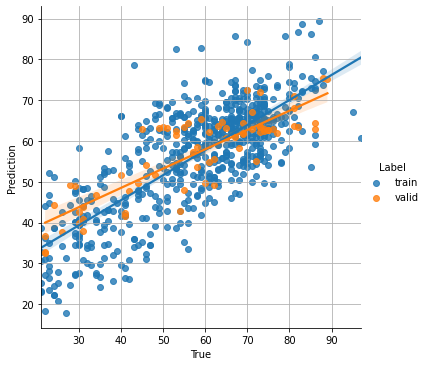

FOLD 5 - EPOCHS 20
MSE  :: [TRAIN] 113.732 | [VALID] 167.193
MAE  :: [TRAIN] 8.623   | [VALID] 10.788
RMSE :: [TRAIN] 10.152  | [VALID] 12.830
CORR :: [TRAIN] 0.766 | [VALID] 0.816
FOLD 5 - EPOCHS 25
MSE  :: [TRAIN] 92.213 | [VALID] 216.139
MAE  :: [TRAIN] 7.768   | [VALID] 12.073
RMSE :: [TRAIN] 9.132  | [VALID] 14.460
CORR :: [TRAIN] 0.815 | [VALID] 0.769


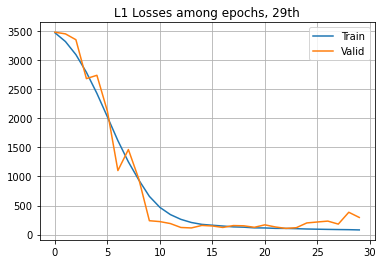

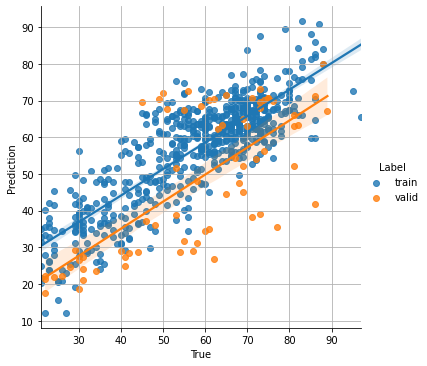

FOLD 5 - EPOCHS 30
MSE  :: [TRAIN] 78.529 | [VALID] 181.354
MAE  :: [TRAIN] 7.138   | [VALID] 10.719
RMSE :: [TRAIN] 8.469  | [VALID] 13.180
CORR :: [TRAIN] 0.844 | [VALID] 0.784
FOLD 5 - EPOCHS 35
MSE  :: [TRAIN] 66.772 | [VALID] 284.971
MAE  :: [TRAIN] 6.574   | [VALID] 13.120
RMSE :: [TRAIN] 7.805  | [VALID] 16.725
CORR :: [TRAIN] 0.869 | [VALID] 0.631


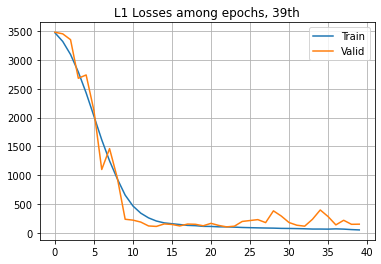

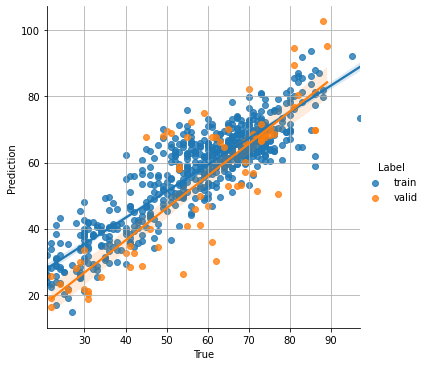

FOLD 5 - EPOCHS 40
MSE  :: [TRAIN] 49.201 | [VALID] 147.956
MAE  :: [TRAIN] 5.541   | [VALID] 9.678
RMSE :: [TRAIN] 6.615  | [VALID] 12.061
CORR :: [TRAIN] 0.905 | [VALID] 0.852
FOLD 5 - EPOCHS 45
MSE  :: [TRAIN] 39.780 | [VALID] 252.136
MAE  :: [TRAIN] 4.929   | [VALID] 13.268
RMSE :: [TRAIN] 5.944  | [VALID] 15.500
CORR :: [TRAIN] 0.924 | [VALID] 0.810


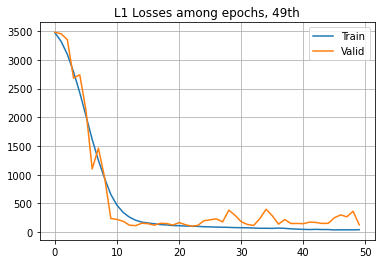

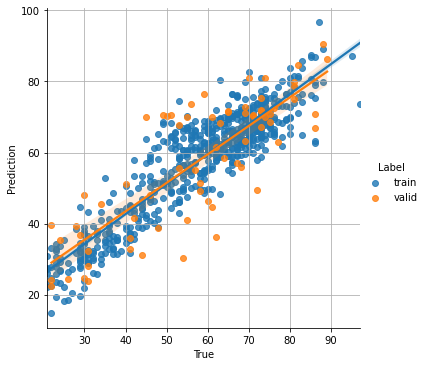

FOLD 5 - EPOCHS 50
MSE  :: [TRAIN] 38.011 | [VALID] 170.834
MAE  :: [TRAIN] 4.807   | [VALID] 9.949
RMSE :: [TRAIN] 5.859  | [VALID] 12.656
CORR :: [TRAIN] 0.928 | [VALID] 0.748
FOLD 5 - EPOCHS 55
MSE  :: [TRAIN] 31.250 | [VALID] 111.891
MAE  :: [TRAIN] 4.272   | [VALID] 8.767
RMSE :: [TRAIN] 5.286  | [VALID] 10.395
CORR :: [TRAIN] 0.941 | [VALID] 0.851


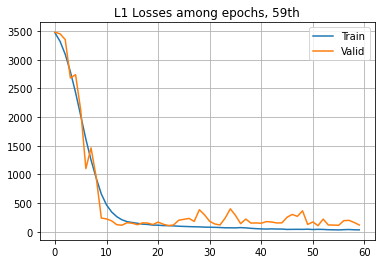

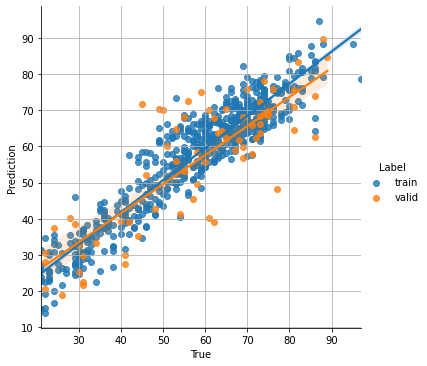

FOLD 5 - EPOCHS 60
MSE  :: [TRAIN] 29.697 | [VALID] 109.198
MAE  :: [TRAIN] 4.239   | [VALID] 8.633
RMSE :: [TRAIN] 5.220  | [VALID] 10.400
CORR :: [TRAIN] 0.944 | [VALID] 0.835
FOLD 5 - EPOCHS 65
MSE  :: [TRAIN] 37.248 | [VALID] 122.910
MAE  :: [TRAIN] 4.727   | [VALID] 9.272
RMSE :: [TRAIN] 5.841  | [VALID] 10.881
CORR :: [TRAIN] 0.929 | [VALID] 0.849


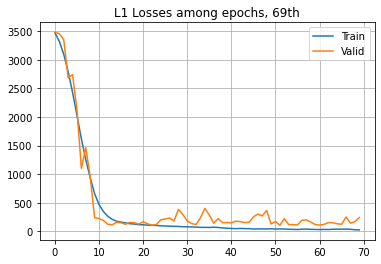

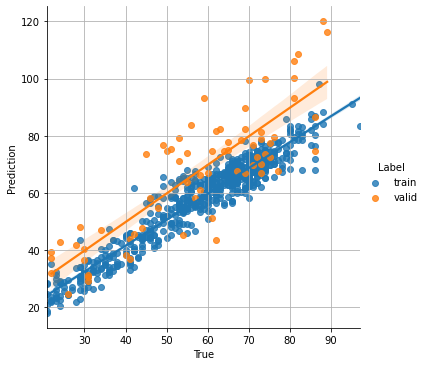

FOLD 5 - EPOCHS 70
MSE  :: [TRAIN] 21.582 | [VALID] 216.728
MAE  :: [TRAIN] 3.569   | [VALID] 11.445
RMSE :: [TRAIN] 4.404  | [VALID] 14.573
CORR :: [TRAIN] 0.960 | [VALID] 0.837


FileNotFoundError: [Errno 2] No such file or directory: '../../brainmask_tlrc\\IXI552-Guys-1063-T1-brainmask_tlrc.npy'

In [7]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []

trn_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

val_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

tst_losses, tst_maes, tst_rmses = [], [], []
for fold in folds:
    
    model = 'dinsdale'
    model, device = load_model('dinsdale')
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    
    train_dset = MyDataset(task_type='age', fold=fold)
    valid_dset = MyDataset(task_type='age', test=True, fold=fold)
    aug_dset = MyDataset(task_type-'age', augment=True)

    train_loader = DataLoader(train_dset, batch_size=8)
    valid_loader = DataLoader(valid_dset, batch_size=8)
    aug_loader = DataLoader(aug_dset, batch_size=8)
    
    trn_losses, val_losses = [], []
    trn_maes, val_maes = [], []
    trn_rmses, val_rmses = [], []
    
    aug_losses, aug_maes, aug_rmses = [], [], []
    
    for e in epochs:

        model, (trn_losses, trn_maes, trn_rmses), trn_preds = train(model, train_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              trn_losses, trn_maes, trn_rmses,
                                                              optimizer, scheduler, lamb)
        
        model, (aug_losses, aug_maes, aug_rmses), aug_preds = train(model, aug_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              aug_losses, aug_maes, aug_rmses,
                                                              optimizer, scheduler, lamb)
        
        model, (val_losses, val_maes, val_rmses), val_preds =  eval(model, valid_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              val_losses, val_maes, val_rmses)


        # SUM UP RESLUTS
        trn_df = make_df(trn_preds, 'train')
        val_df = make_df(val_preds, 'valid')
        aug_df = make_df(aug_preds, 'train')
        reg_df = pd.concat([trn_df, val_df, aug_df], ignore_index=True)

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        val_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        if e % 5 == 0:
            print(f'FOLD {fold} - EPOCHS {e}')
            print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {val_losses[-1]:.3f}')
            print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {val_maes[-1]:.3f}')
            print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {val_rmses[-1]:.3f}')
            print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {val_corr:.3f}')

        if e % 10 == 9:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(val_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold['MSE'].append(trn_losses)
    trn_fold['MAE'].append(trn_maes)
    trn_fold['RMSE'].append(trn_rmses)
    trn_fold['Correlation'].append(trn_corr)
    
    val_fold['MSE'].append(val_losses)
    val_fold['MAE'].append(val_maes)
    val_fold['RMSE'].append(val_rmses)
    val_fold['Correlation'].append(val_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    model, (tst_losses, tst_maes, tst_rmses), tst_preds = eval(model, test_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              tst_losses, tst_maes, tst_rmses)

    tst_df = make_df(tst_preds, 'test')
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    
    print(f'FOLD {fold}', end='')
    print(f'MSE  :: [TEST] {tst_losses[-1]:.3f}')
    print(f'MAE  :: [TEST] {tst_maes[-1]:.3f}')
    print(f'RMSE :: [TEST] {tst_rmses[-1]:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns_plot = sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    sns_plot.savefig(f'{fold}.png')
    plt.grid()
    plt.show()
    
    del model
    torch.cuda.empty_cache()

In [ ]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []

trn_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

tst_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

for fold in folds:
    
    train_dset = MyDataset(task_type='age', fold=fold)
    test_dset = MyDataset(task_type='age', test=True, fold=fold)

    train_loader = DataLoader(train_dset, batch_size=8)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    trn_losses, tst_losses = [], []
    trn_maes, tst_maes = [], []
    trn_rmses, tst_rmses = [], []
    for e in epochs:

        # TRAIN
        trn_bth_loss, trn_bth_mae, trn_bth_rmse = 0, 0, 0
        trn_trues, trn_preds = [], []
        model.train()
        for i, (x, y) in enumerate(train_loader):

            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            optimizer.zero_grad()

            y_pred = model.forward(x).to(device)

            trn_trues.append(y.to('cpu'))
            trn_preds.append(y_pred.to('cpu'))

            # Loss
            loss = loss_fn(y_pred.squeeze(1), y)
            
            # Metrics
            mae = mae_fn(y_pred.squeeze(1), y)
            rmse = rmse_fn(y_pred.squeeze(1), y)
            
            del x, y, y_pred

            loss.backward()
            optimizer.step()
            if scheduler: scheduler.step()

            trn_bth_loss += loss.item()
            trn_bth_mae  += loss.item()
            trn_bth_rmse += loss.item()

        torch.cuda.empty_cache()

        ### loss
        trn_losses.append(trn_bth_loss / len(train_loader))
        trn_maes.append(trn_bth_mae / len(train_loader))
        trn_rmses.append(trn_bth_rmse / len(train_loader))

        ### collect trues/predictions
        trn_trues = list(chain(*trn_trues))
        trn_preds = list(chain(*trn_preds))

        
        # VALID
        tst_bth_loss, tst_bth_mae, tst_bth_rmse = 0, 0, 0
        model.eval()
        tst_trues, tst_preds = [], []
        with torch.no_grad(): # to not give loads on GPU... :(
            for i, (x, y) in enumerate(test_loader):
                if resize:
                    x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

                else:
                    x, y = x.to(device), y.to(device)

                y_pred = model.forward(x).to(device)

                tst_trues.append(y.to('cpu'))
                tst_preds.append(y_pred.to('cpu'))

                # Loss
                loss = loss_fn(y_pred.squeeze(1), y)
                
                # Metrics
                mae = mae_fn(y_pred.squeeze(1), y)
                rmse = rmse_fn(y_pred.squeeze(1), y)
                
                del x, y, y_pred

                tst_bth_loss += loss.item()
                tst_bth_mae  += loss.item()
                tst_bth_rmse += loss.item()
                
        torch.cuda.empty_cache()
        
        ### loss
        tst_losses.append(tst_bth_loss / len(test_loader))
        tst_maes.append(tst_bth_mae / len(test_loader))
        tst_rmses.append(tst_bth_rmse / len(test_loader))

        ### collect trues/predictions
        tst_trues = list(chain(*tst_trues))
        tst_preds = list(chain(*tst_preds))

        
        # SUM UP RESLUTS
        reg_df = pd.DataFrame({
            'True': list(map(float, trn_trues + tst_trues)),
            'Prediction': list(map(float, trn_preds + tst_preds)),
            'Label': ['train'] * len(trn_trues) + ['valid'] * len(tst_trues)
        })

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        tst_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        if e % 5 == 0:
            print(f'FOLD {fold} - EPOCHS {e}')
            print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
            print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {tst_maes[-1]:.3f}')
            print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {tst_rmses[-1]:.3f}')
            print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')

        if e % 10 == 9:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(tst_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold['MSE'].append(trn_losses)
    trn_fold['MAE'].append(trn_maes)
    trn_fold['RMSE'].append(trn_rmses)
    trn_fold['Correlation'].append(trn_corr)
    
    tst_fold['MSE'].append(tst_losses)
    tst_fold['MAE'].append(tst_maes)
    tst_fold['RMSE'].append(tst_rmses)
    tst_fold['Correlation'].append(tst_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    tst_bth_loss = 0
    model.eval()
    tst_trues, tst_preds = [], []
    with torch.no_grad(): # to not give loads on GPU... :(
        for i, (x, y) in enumerate(test_loader):
            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            y_pred = model.forward(x).to(device)

            tst_trues.append(y.to('cpu'))
            tst_preds.append(y_pred.to('cpu'))

            loss = loss_fn(y_pred.squeeze(1), y)
            
            mae = mae_fn(y_pred.squeeze(1), y)
            rmse = rmse_fn(y_pred.squeeze(1), y)
            del x, y, y_pred

            tst_bth_loss += loss.item()

    torch.cuda.empty_cache()
    ### loss
    tst_loss = tst_bth_loss / len(test_loader)

    ### collect trues/predictions
    tst_trues = list(chain(*tst_trues))
    tst_preds = list(chain(*tst_preds))
    
    tst_df = pd.DataFrame({
        'True': list(map(float, tst_trues)),
        'Prediction': list(map(float, tst_preds)),
        'Label': ['test'] * len(tst_trues)
    })
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    print(f'FOLD {fold}', end='')
    print(f'RMSE :: [TEST] {tst_loss:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()